In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'movies.csv')


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [2]:
#Find Missing Data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [3]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
df = df.dropna()

In [5]:
#Change Data Types of Columns
df['budget'] = df['budget'].astype('float64')
df['gross'] = df['gross'].astype('float64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [6]:
df['month'] = df['released'].str.extract(r'([A-Za-z]+) \d+, \d+')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,January
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,February
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,January
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,February


In [7]:
df.sort_values(by=['gross'], inplace = False, ascending = False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,January
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,February
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,January
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,February


In [8]:
#Drop Duplicates

df.drop_duplicates(inplace=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,January
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,February
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,January
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,February


Does a larger budget produce higher gross profits?

In [37]:
df_subset = df.head(6000)

In [38]:
from scipy.stats import ttest_ind
gross_t = df_subset['gross']
budget_t = df_subset['budget']
t_statistic, p_value = ttest_ind(gross_t, budget_t, nan_policy = 'omit')
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of the two groups.")
    

T-statistic: 25.796130717372776
P-value: 1.844085642253087e-142
Reject null hypothesis: There is a significant difference between the means of the two groups.


F-statistic: 665.4403599877835
P-value: 1.844085642260908e-142
Reject null hypothesis: There are significant differences between groups.


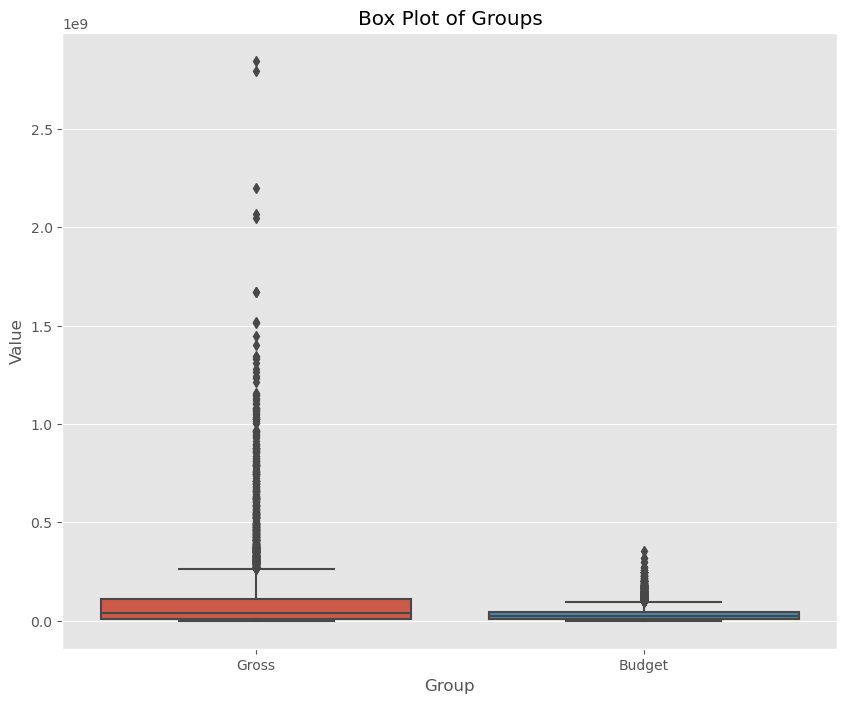

In [58]:
from scipy.stats import f_oneway

gross_f = df_subset['gross']
budget_f = df_subset['budget']
# Perform ANOVA
f_statistic, p_value = f_oneway(gross_f,budget_f)

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There are significant differences between groups.")
else:
    print("Fail to reject null hypothesis: There are no significant differences between groups.")

    
data = pd.DataFrame({'Gross': gross_f, 'Budget': budget_f})    
#Box Plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
#plt.ylim(0,10E7)
plt.title('Box Plot of Groups')
plt.xlabel('Group')
plt.ylabel('Value')
plt.show()

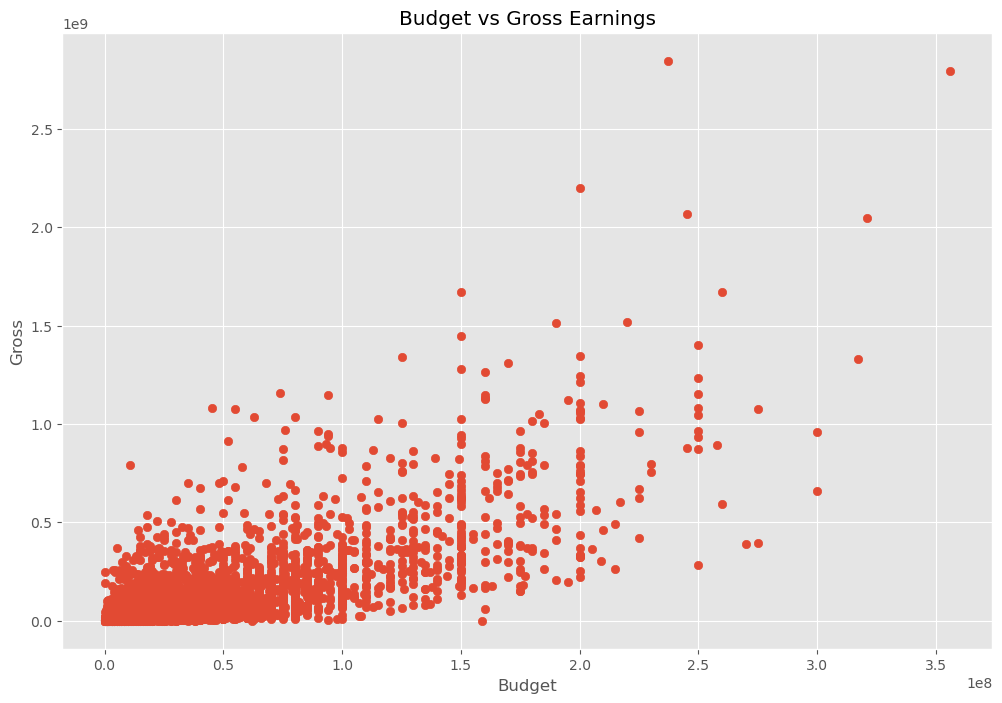

In [32]:
# Lets look at a scatter plot for Budget vs Gross

plt.scatter(x = df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()
#df.head()

<Axes: xlabel='budget', ylabel='gross'>

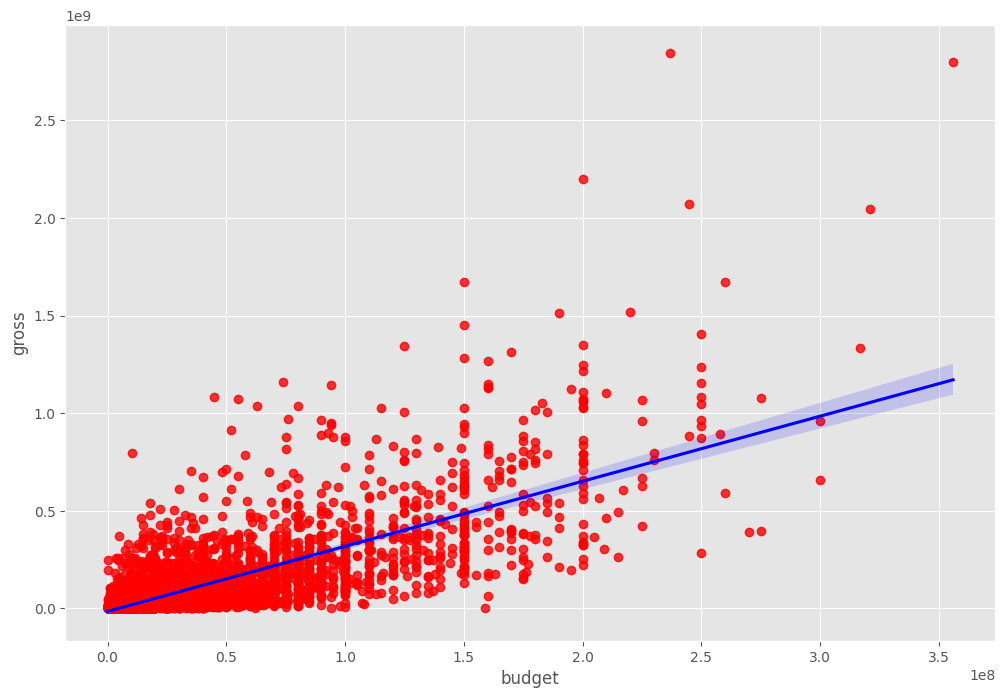

In [81]:
sns.regplot(x= 'budget', y='gross', data = df, scatter_kws = {"color":"red"}, line_kws = {"color":"blue"})

In [94]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


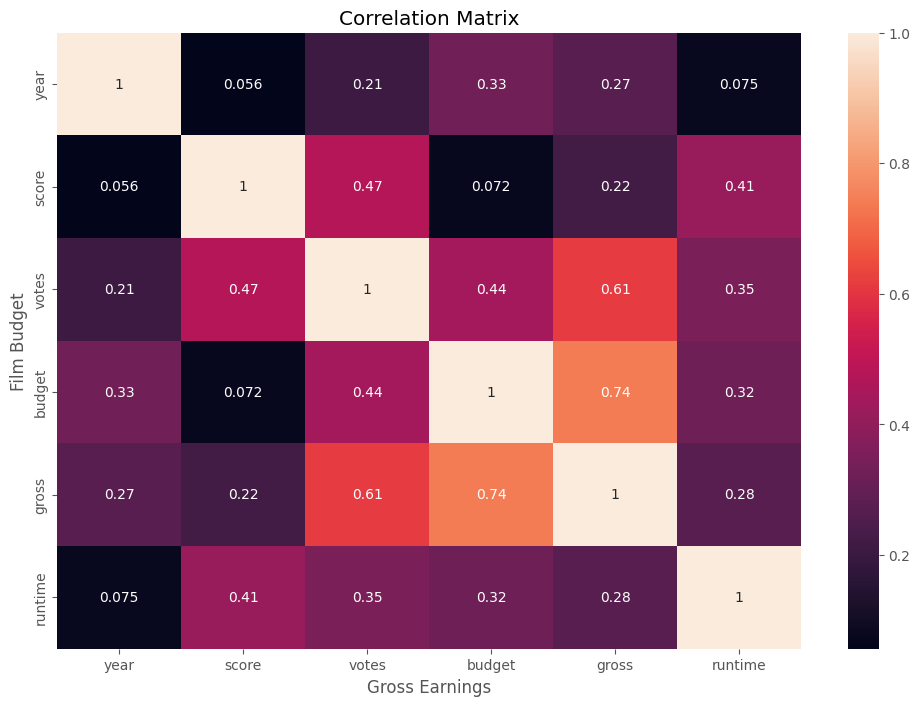

In [96]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Gross Earnings')
plt.ylabel('Film Budget')
plt.show()